<a href="https://colab.research.google.com/github/justina-tran/employee-attrition/blob/main/attrition_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis
How well could a People Analytics group predict which employees an org will lose through attrition? Which factors are closely correlated with employees leaving the org?  
Dataset: [Employee Attrition
](https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition)

1. EDA
2. Data Preprocessing
3. Build Classification Model
4. Evaluate Results

The objective is to identify the factors that lead to employee attrition and predict which employees the company will lose through attrition. From a sample size of 1470 employees, about 20% of the dataset covers attrition, of which half is coming from employess in R&D followed by sales. We discovered income, age, and working overtime are key factors in detecting attrition. Employees will more likely leave the company if they are working overtime and their compensation, age, and years at the company is low. The classification model can predict about 16% of all attrition cases and correctly identify 75% of all predicted attrition cases. To keep attrition low, HR should focus on employees with less years of experience in the R&D and sales departments to ensure job satisfaction and offer competitive pay so each employee is compensated equally and fairly. 

In [ ]:
! pip install h2o -q

     |████████████████████████████████| 177.4 MB 26 kB/s 


In [ ]:
! pip install kaggle -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams["figure.figsize"] = (15, 12)
pd.set_option('display.max_columns', None)

## Load Dataset

In [ ]:
! mkdir ~/.kaggle

In [ ]:
cd ~/.kaggle

/root/.kaggle


In [ ]:
! cp '/content/drive/MyDrive/Projects/kaggle.json' ~/.kaggle/

In [ ]:
! ls

kaggle.json


In [ ]:
! kaggle datasets download whenamancodes/hr-employee-attrition

  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 15.2MB/s]


In [ ]:
! ls

hr-employee-attrition.zip  kaggle.json


## EDA

In [ ]:
df = pd.read_csv('hr-employee-attrition.zip')
raw_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
 df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Features such as Over18, EmployeeNumber, EmployeeCount, and StandardHours do not provide any useful information since it has all the same values. These features can be dropped.

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df[['Attrition','YearsWithCurrManager']].value_counts() / len(df)

Attrition  YearsWithCurrManager
No         2                       0.200000
           7                       0.125850
           0                       0.121088
           3                       0.083673
           8                       0.065986
           4                       0.059184
Yes        0                       0.057823
No         1                       0.044218
           9                       0.039456
Yes        2                       0.034014
           7                       0.021088
No         5                       0.018367
           6                       0.017007
           10                      0.016327
           11                      0.014286
Yes        3                       0.012925
No         12                      0.012245
           13                      0.009524
Yes        1                       0.007483
           4                       0.007483
           8                       0.006803
No         17                      0.004762


In [ ]:
df[['Attrition','Department']].value_counts() / len(df)

Attrition  Department            
No         Research & Development    0.563265
           Sales                     0.240816
Yes        Research & Development    0.090476
           Sales                     0.062585
No         Human Resources           0.034694
Yes        Human Resources           0.008163
dtype: float64

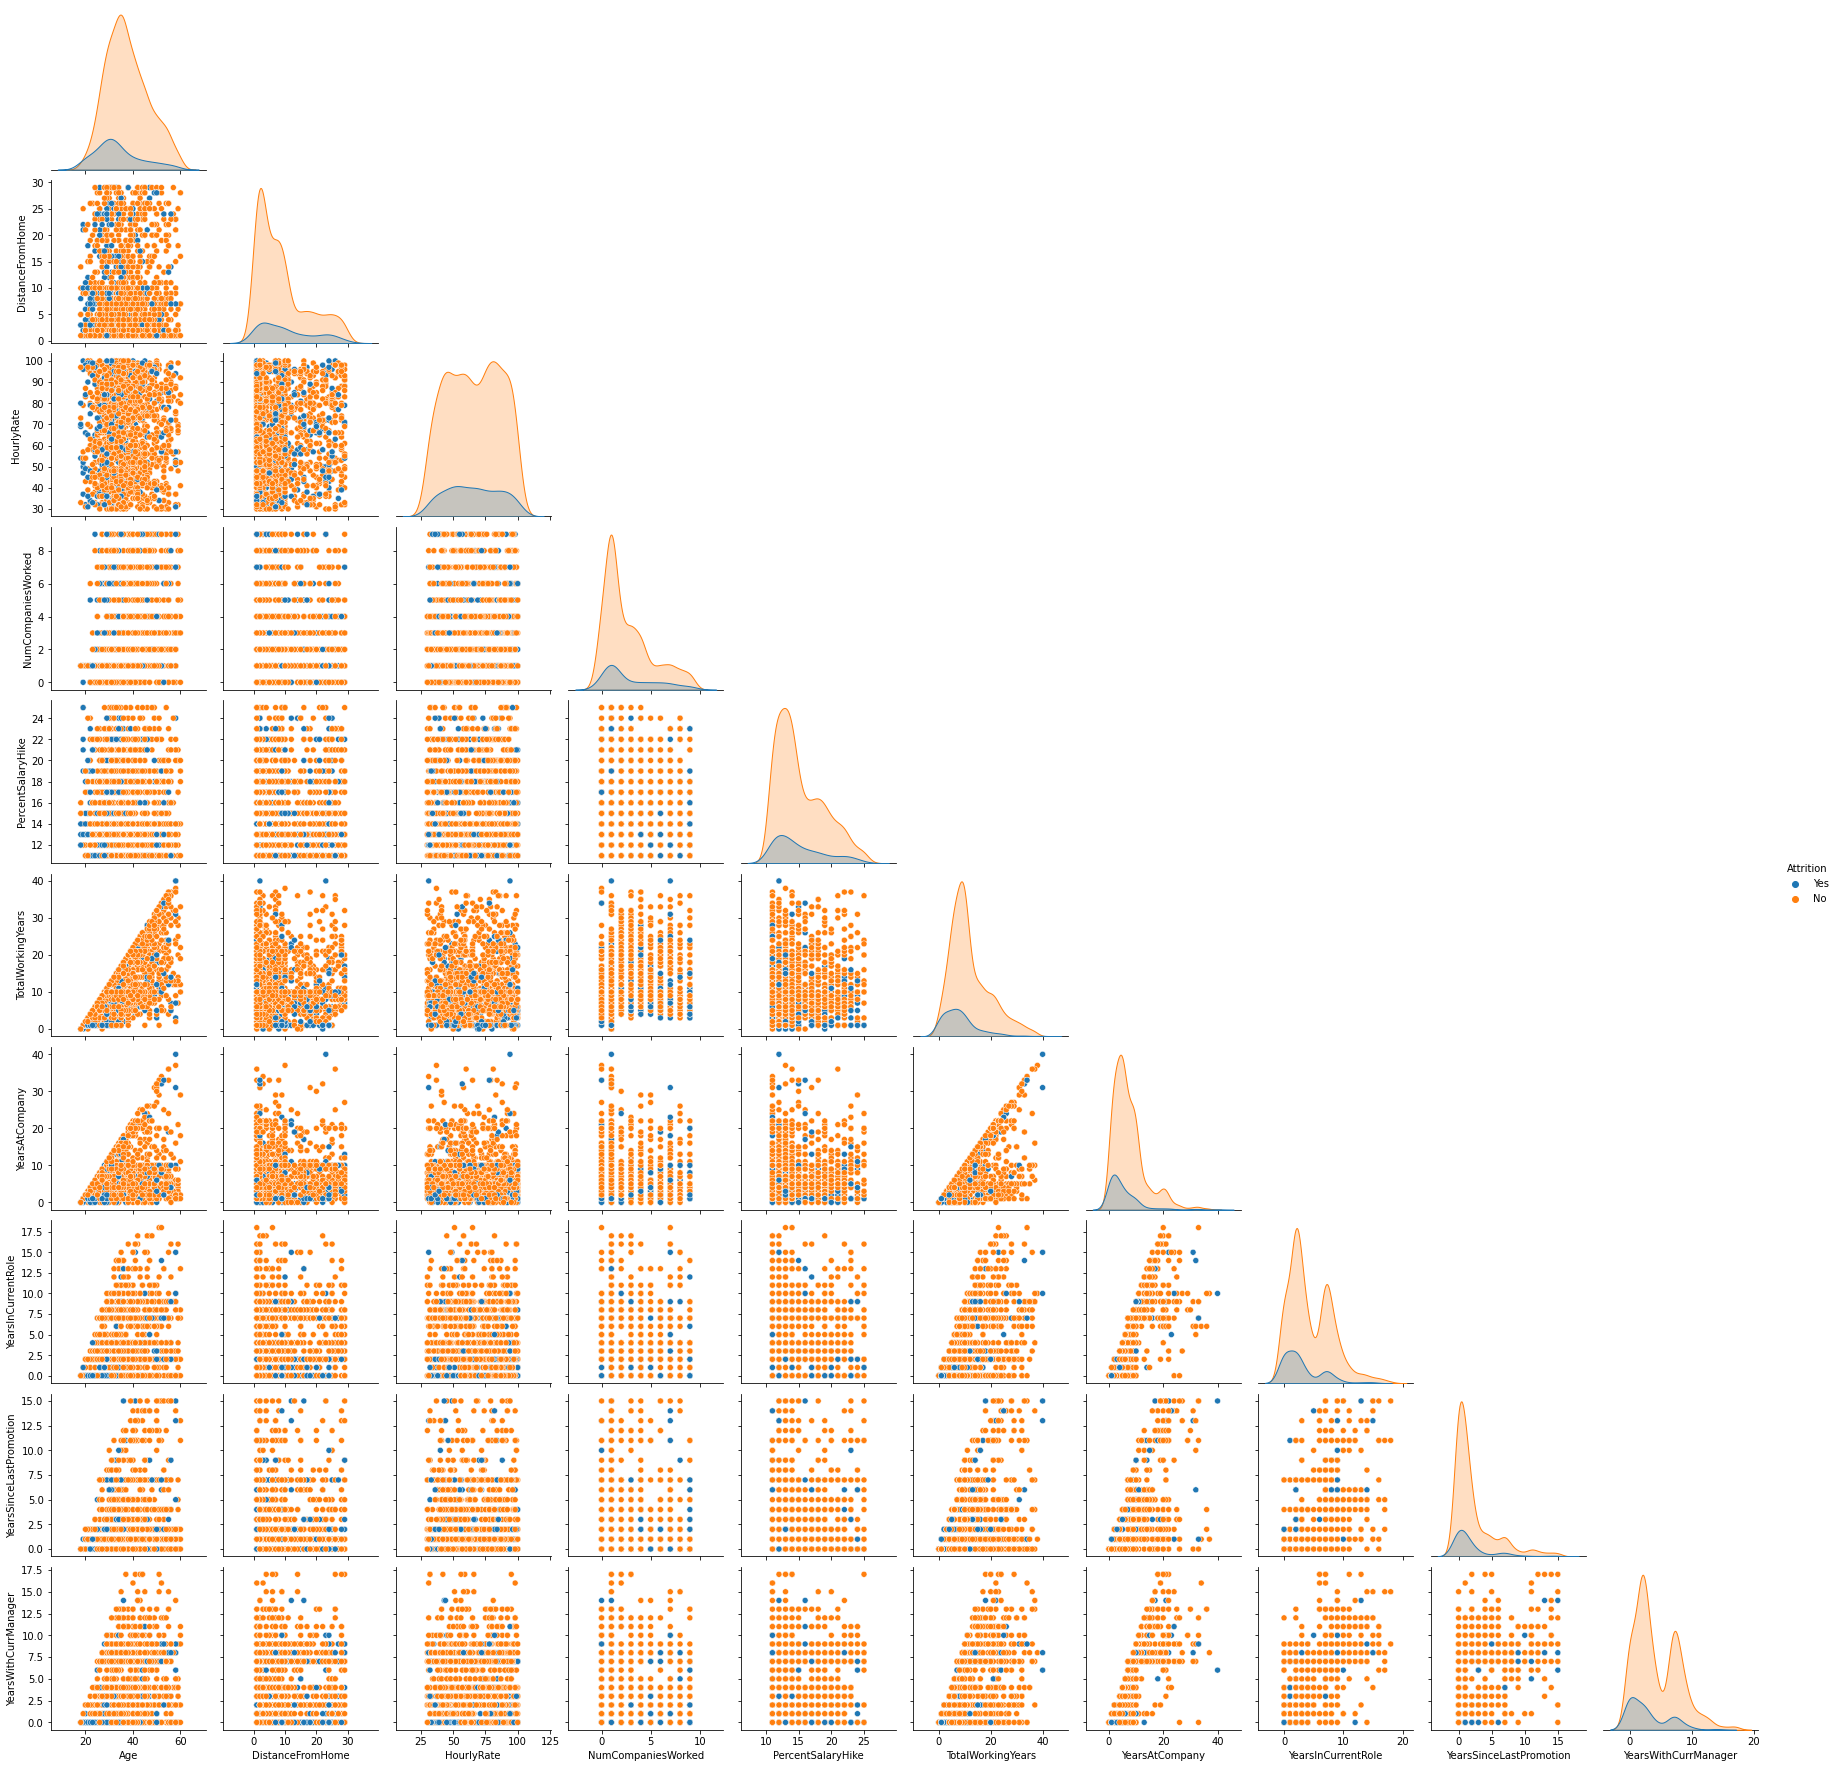

In [ ]:
_cols = ['Attrition', 'Age', 'DistanceFromHome', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
sns.pairplot(data=df[_cols], hue="Attrition", corner=True)

- About 20% of the dataset is from employee attrition.
- About half of employees who left were from the Research and Development department, followed by people in Sales.
- People who left have less years of working experience, worked less years at the company, and tend to be younger in age compared to other employees who stayed at the company.

In [ ]:
df["Attrition"] = np.where(df["Attrition"].str.contains("Yes"), 1, 0)
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
# drop columns
df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'], axis=1, inplace=True)

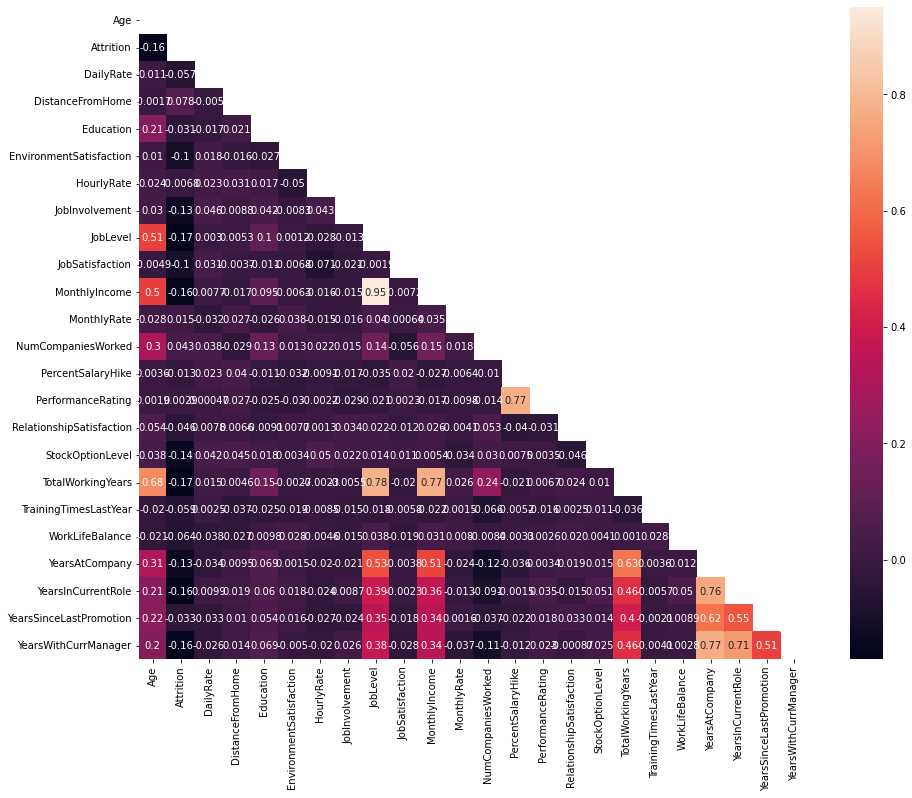

In [ ]:
corr = df.corr()
upper = np.triu(corr) # upper matrix
sns.heatmap(corr, mask=upper, annot=True)

There are a few highly correlated fields:
- MonthlyIncome and TotalWorkingYears are highly positively correlated with the JobLevel (0.95 and 0.78)
- PerformanceRating and PercentSalaryHike are highly positively correlated (0.77)
- YearsAtCompany is highly positively correlated with YearInCurrentRole (0.76), YearWithCurrManager (0.77), and YearsSinceLastPromotion (0.62)

Consider dropping a few of these correlated fields before modeling.

In [ ]:
# drop highly correlated features
df.drop(['PerformanceRating', 'JobLevel', 'YearsWithCurrManager'], axis=1, inplace=True)

## Data Preprocessing


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
nums = df.select_dtypes(include='int64').columns
objs = df.select_dtypes(include='object').columns
print(nums)
print(objs)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [ ]:
# encode categorical cols
encoded_df = df.copy()
encoder = OneHotEncoder(sparse=False).fit(df[objs])
encoded_cols = list(encoder.get_feature_names_out(objs))
encoded_df[encoded_cols] = encoder.transform(encoded_df[objs])
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df_train = encoded_df.drop(objs, axis=1) # drop original obj cols
df_train = df_train.apply(pd.to_numeric, downcast='integer')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int8 
 1   Attrition                          1470 non-null   int8 
 2   DailyRate                          1470 non-null   int16
 3   DistanceFromHome                   1470 non-null   int8 
 4   Education                          1470 non-null   int8 
 5   EnvironmentSatisfaction            1470 non-null   int8 
 6   HourlyRate                         1470 non-null   int8 
 7   JobInvolvement                     1470 non-null   int8 
 8   JobSatisfaction                    1470 non-null   int8 
 9   MonthlyIncome                      1470 non-null   int16
 10  MonthlyRate                        1470 non-null   int16
 11  NumCompaniesWorked                 1470 non-null   int8 
 12  PercentSalaryHike   

## Building Classification Model
1. Train/test split the dataset
2. Use cross validation to evaluate baseline performance for random forest
3. Evaluate using f1-macro score: calculates each class f1 score then takes the average. This evaluation metric will penalize the model results for each class equally, regardless of the size of the classes, making this a good metric for this imbalanced classification problem.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.tree import plot_tree, export_text

In [ ]:
target = 'Attrition'
features = df_train.drop(target, axis=1)
labels = df_train[target]

In [ ]:
# create train/validation/test splits
X, X_test, y, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(940, 48) (940,)
(236, 48) (236,)
(294, 48) (294,)


In [ ]:
y_train.value_counts() / len(y_train)

0    0.838298
1    0.161702
Name: Attrition, dtype: float64

In [ ]:
y_val.value_counts() / len(y_val)

0    0.838983
1    0.161017
Name: Attrition, dtype: float64

In [ ]:
y_test.value_counts() / len(y_test)

0    0.840136
1    0.159864
Name: Attrition, dtype: float64

By stratifying the labels, it will retain the label/target distribution in each of the dataset splits. The train/validation/test dataset each has about 16% of the labels = 1 which is closely representative of the label distrbution for the entire dataset (about 19% of the dataset is attrition).

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
cross_val_score(rf, X, y, scoring='f1',cv=5).mean()

0.26414493743002204

In [ ]:
cross_val_score(rf, X, y, scoring='accuracy',cv=5).mean()

0.8588532275513885

The purpose of using cross validation is it gives us a good idea of how the model will perform regardless of how the train/valid dataset was split.

The dataset is split cv=5 times and evaluated each time using a metric. The final score is the average of the scores. F1-macro score is a good evaluation metric for imbalance classes over the accuracy score. With 5 fold CV, the baseline F1-macro score for a random forest model is 0.26. On the other hand, the accuracy score is 0.86, which is high because it's predicting all of the non-attrition samples and that is not what we are interested in predicting.


In [ ]:
rf.fit(X_train, y_train)
rf_train_preds = rf.predict(X_train)
rf_val_preds = rf.predict(X_val)

#evaluate
print('Train F1:', f1_score(y_train, rf_train_preds, average='macro'))
print('Val F1:', f1_score(y_val, rf_val_preds, average='macro'))
print(confusion_matrix(y_val, rf_val_preds))
print(classification_report(y_val, rf_val_preds))

Train F1: 1.0
Val F1: 0.5905286793223107
[[196   2]
 [ 32   6]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       198
           1       0.75      0.16      0.26        38

    accuracy                           0.86       236
   macro avg       0.80      0.57      0.59       236
weighted avg       0.84      0.86      0.81       236



Positive class is when attrition=1, negative class is when attrition=0:
- False Positive (Type 1 error): 2 - predicted to be true (attrition) but is not 
- False Negative (Type 2 error): 32 - predicted to be not true but actually is
- True Positives: 6 
- True Negatives: 196

Recall: tells us out of all the positive class, how many did the model capture? 
- TP / (TP + FN)   = 0.16   

Precision: tells us out of all the predicted positive class, how many are actually positive?
- TP / (TP + FP) = 0.75

F1-score is the weighted average of precision and recall, and is useful if we care both about precision and recall or want to compare models' performance. 


While it's important to identify as many people that will be loss through attrition, it's also equally as important to not incorrectly flag someone as likely to leave a company when they won't. If we place more importance on capturing all attrition (recall), the model can predict about 16% of people who will leave the company.  If we care more about being more precise on people leaving (precision), the model correctly identifies 75% of all predicted attrition cases.


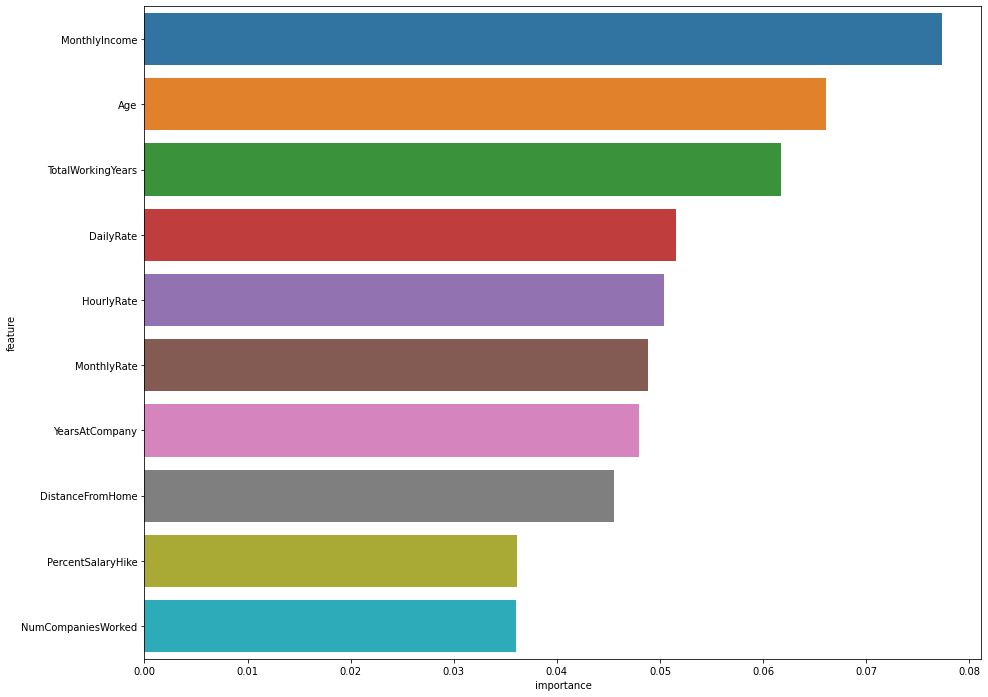

In [ ]:
# evaluate feature importances
feature_imp = rf.feature_importances_
tree_imp_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_imp
    }).sort_values('importance', ascending=False)
sns.barplot(data=tree_imp_df.head(10), x='importance', y='feature');

The most important features are MonthlyIncome and Age. Along with MonthlyIncome, we have other variation of income such as the daily/hourly/monthly rate and the PercentSalaryHike. In my initial analysis, I also noted employees who left tend to be younger in age with less years of experience compared to those employees who stayed at a company. So it's no surprise to see Age, TotalWorkingYears, and YearsAtCompany as important factors as well. 

Compensation is a key factor in keeping employees at a company.  Along with wages, age is a key indicator of attrition.

[Text(0.5, 0.9, 'BusinessTravel_Travel_Frequently <= 0.5\ngini = 0.298\nsamples = 592\nvalue = [769, 171]'),
 Text(0.25, 0.7, 'Age <= 29.5\ngini = 0.266\nsamples = 477\nvalue = [638, 120]'),
 Text(0.125, 0.5, 'BusinessTravel_Non-Travel <= 0.5\ngini = 0.41\nsamples = 115\nvalue = [124, 50]'),
 Text(0.0625, 0.3, 'YearsAtCompany <= 2.5\ngini = 0.432\nsamples = 103\nvalue = [106, 49]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'WorkLifeBalance <= 2.5\ngini = 0.1\nsamples = 12\nvalue = [18, 1]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'OverTime_Yes <= 0.5\ngini = 0.211\nsamples = 362\nvalue = [514, 70]'),
 Text(0.3125, 0.3, 'EducationField_Life Sciences <= 0.5\ngini = 0.137\nsamples = 248\nvalue = [374, 30]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'JobSatisfaction <= 3.5\ngini = 0.346\nsamples = 114\nvalue = [140, 40]'),
 Text(

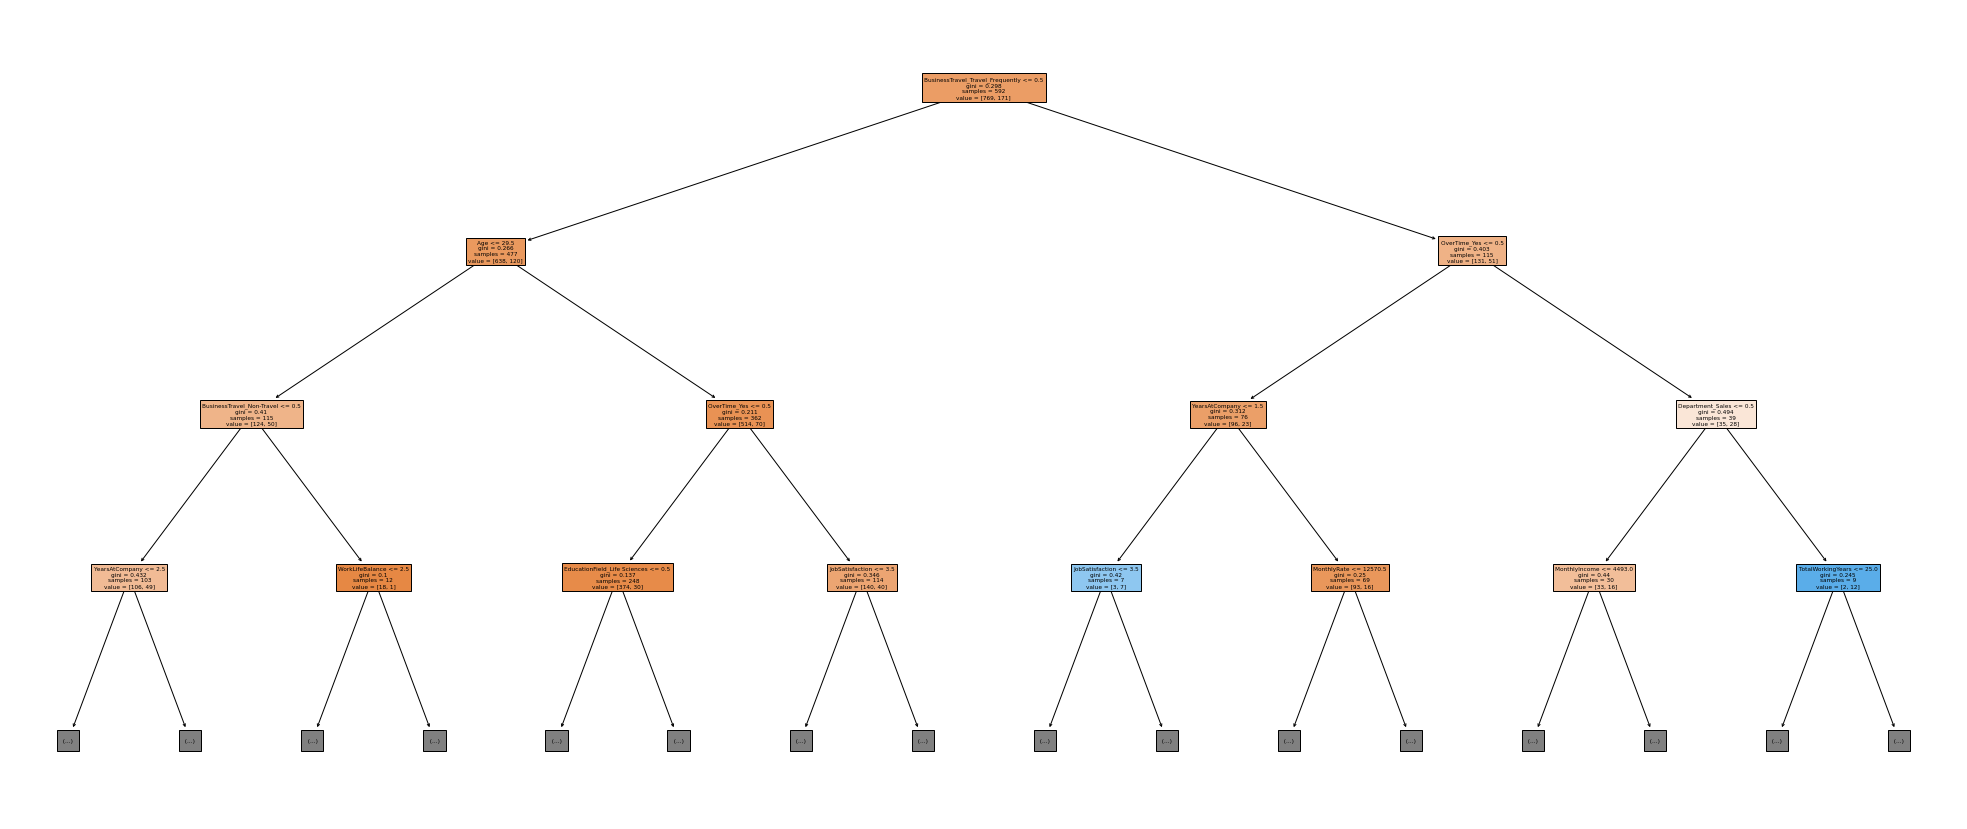

In [ ]:
plt.figure(figsize=(35,15))
plot_tree(rf.estimators_[0], feature_names=X.columns, max_depth=3, filled=True)

In [ ]:
# text from the decision tree
tree_text = export_text(rf.estimators_[0], max_depth=3, feature_names=list(X.columns))
print(tree_text)

|--- BusinessTravel_Travel_Frequently <= 0.50
|   |--- Age <= 29.50
|   |   |--- BusinessTravel_Non-Travel <= 0.50
|   |   |   |--- YearsAtCompany <= 2.50
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- YearsAtCompany >  2.50
|   |   |   |   |--- truncated branch of depth 8
|   |   |--- BusinessTravel_Non-Travel >  0.50
|   |   |   |--- WorkLifeBalance <= 2.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- WorkLifeBalance >  2.50
|   |   |   |   |--- truncated branch of depth 3
|   |--- Age >  29.50
|   |   |--- OverTime_Yes <= 0.50
|   |   |   |--- EducationField_Life Sciences <= 0.50
|   |   |   |   |--- truncated branch of depth 9
|   |   |   |--- EducationField_Life Sciences >  0.50
|   |   |   |   |--- truncated branch of depth 8
|   |   |--- OverTime_Yes >  0.50
|   |   |   |--- JobSatisfaction <= 3.50
|   |   |   |   |--- truncated branch of depth 9
|   |   |   |--- JobSatisfaction >  3.50
|   |   |   |   |--- truncated branch of depth 7
|--- BusinessTravel_

From the decision tree, there are two groups of employees who are likely to leave a company: 
1. An employee who doesn't travel much and doesn't work overtime, yet has lower job satisfication and less years of experience at the company.
  - BusinessTravel_Travel_Frequently - No
  - Overtime - No
  - YearsAtCompany <= 1.5
  - Job satisfaction - 3.5

2. An employee from the Sales team that travel frequently and works overtime, with less working years of experience
  - BusinessTravel_Travel_Frequently - Yes
  - Overtime - Yes
  - Department - Sales
  - TotalWorkingYears <= 25

## Hyperparameter Tuning

In [ ]:
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 20, 50],
    'criterion' : ['gini', 'entropy'],
    'class_weight': ['balanced']
}

In [ ]:
rf_gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5, scoring='f1')
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='f1')

In [ ]:
print(rf_gs.best_params_)
print(rf_gs.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
0.47696113443937255


In [ ]:
best_rf = RandomForestClassifier(criterion='gini', max_depth=20, max_features='log2', n_estimators=50, class_weight='balanced', random_state=42)
best_rf.fit(X_train, y_train)
train_pred = best_rf.predict(X_train)
val_pred = best_rf.predict(X_val)
test_pred = best_rf.predict(X_test)

#evaluate
print('Train F1:', f1_score(y_train, train_pred, average='macro'))
print('Val F1:', f1_score(y_val, val_pred, average='macro'))
print('Test F1:', f1_score(y_test, test_pred, average='macro'))

print(confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred))

Train F1: 0.9980327772789961
Val F1: 0.5946916471506635
Test F1: 0.5687531980214907
[[245   2]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.75      0.13      0.22        47

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.57       294
weighted avg       0.84      0.85      0.81       294



After grid search and hyperparameter tuning, the F1-score barely improved from baseline performance. There's probably a better approach to deal with this class imbalance problem. For now, I'll also evaluate h2o's automl performance.

## H2O AutoML
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp95b_aqbn
  JVM stdout: /tmp/tmp95b_aqbn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp95b_aqbn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,22 hours and 49 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_p2j9ey
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2


In [ ]:
df_train.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,4,5993,19479,8,11,1,0,8,0,1,6,4,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,5130,24907,1,23,4,1,10,3,3,10,7,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,3,2090,2396,6,15,2,0,7,3,3,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,3,2909,23159,1,11,3,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,2,3468,16632,9,12,4,1,6,3,3,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int8 
 1   Attrition                          1470 non-null   int8 
 2   DailyRate                          1470 non-null   int16
 3   DistanceFromHome                   1470 non-null   int8 
 4   Education                          1470 non-null   int8 
 5   EnvironmentSatisfaction            1470 non-null   int8 
 6   HourlyRate                         1470 non-null   int8 
 7   JobInvolvement                     1470 non-null   int8 
 8   JobSatisfaction                    1470 non-null   int8 
 9   MonthlyIncome                      1470 non-null   int16
 10  MonthlyRate                        1470 non-null   int16
 11  NumCompaniesWorked                 1470 non-null   int8 
 12  PercentSalaryHike   

In [ ]:
# Import dataset into H2O
dataset_hf = h2o.H2OFrame(df_train)
dataset_hf.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:1470
Cols:49

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,18.0,0.0,102.0,1.0,1.0,1.0,30.0,1.0,1.0,1009.0,2094.0,0.0,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,36.92380952380955,0.16122448979591836,802.4857142857132,9.19251700680272,2.912925170068027,2.7217687074829935,65.89115646258502,2.7299319727891174,2.7285714285714326,6502.931292517012,14313.103401360513,2.6931972789115646,15.209523809523821,2.7122448979591858,0.7938775510204085,11.279591836734703,2.799319727891153,2.7612244897959215,7.008163265306127,4.229251700680271,2.187755102040815,0.10204081632653061,0.18843537414965986,0.7095238095238096,0.04285714285714286,0.6537414965986394,0.3034013605442177,0.018367346938775512,0.4122448979591837,0.10816326530612246,0.31564625850340133,0.055782312925170066,0.08979591836734693,0.4,0.6,0.0891156462585034,0.03537414965986395,0.1761904761904762,0.06938775510204082,0.09863945578231292,0.05442176870748299,0.19863945578231293,0.2217687074829932,0.05646258503401361,0.22244897959183674,0.45782312925170066,0.3197278911564626,0.7170068027210884,0.2829931972789116
maxs,60.0,1.0,1499.0,29.0,5.0,4.0,100.0,4.0,4.0,19999.0,26999.0,9.0,25.0,4.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,9.13537348913673,0.367863031971962,403.509099943528,8.10686443566608,1.0241649445978718,1.0930822146350003,20.329427593996176,0.7115611429632298,1.1028461230547213,4707.956783097992,7117.786044059972,2.4980090060707467,3.6599377165396385,1.0812088864403517,0.8520766679308381,7.780781675514995,1.2892706207958466,0.7064758297141507,6.126525152403571,3.623137034670627,3.2224302791379693,0.3028049914822901,0.3911925191503186,0.4541366232883603,0.20260388001905263,0.47593869968752295,0.45988351530535565,0.13432148432863786,0.4924063195687225,0.31069219456891634,0.4649309046759738,0.22957896517896706,0.2859864501632868,0.4900646655764546,0.4900646655764546,0.28500755407821154,0.18478649247077245,0.38111179360982794,0.2541988428808876,0.29827879159669,0.22692525302047808,0.39911174257038107,0.41557771132009447,0.23089137574683485,0.41603266064897354,0.4983874842132633,0.4665297718438262,0.450606451598178,0.450606451598178
zeros,0,1233,0,0,0,0,0,0,0,0,0,197,0,0,631,11,54,0,44,244,581,1320,1193,427,1407,509,1024,1443,864,1311,1006,1388,1338,882,588,1339,1418,1211,1368,1325,1390,1178,1144,1387,1143,797,1000,416,1054
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,41.0,1.0,1102.0,1.0,2.0,2.0,94.0,3.0,4.0,5993.0,19479.0,8.0,11.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0

In [ ]:
# Identify predictors and response
x = dataset_hf.columns
y = "Attrition"
x.remove(y)
print(x)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_

In [ ]:
train,test,valid = dataset_hf.split_frame(ratios=[.7, .15], seed=12)
print(train.shape)
print(valid.shape)
print(test.shape)

(1042, 49)
(224, 49)
(204, 49)


In [ ]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
valid[y] = train[y].asfactor()
test[y] = test[y].asfactor()

In [ ]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=10, seed=1, sort_metric='AUCPR', balance_classes=True)

In [ ]:
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_4_20221028_152727

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04964826599368071
RMSE: 0.2228189085191845
LogLoss: 0.1888126318824792
AUC: 0.9740621935272965
AUCPR: 0.9197192177586905
Gini: 0.948124387054593
Null degrees of freedom: 1041
Residual degrees of freedom: 1037
Null deviance: 920.5054175755596
Residual deviance: 393.4855248430865
AIC: 403.4855248430865

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42566539154022426
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      866  8    0.0092   (8.0/874.0)
1      40   128  0.2381   (40.0/168.0)
Total  906  136  0.0461   (48.0/1042.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.425665     0.842105  109
max f2                       0.316768     0.857474  146
max f0point5                 0.479926     0.902367  101
max accuracy                 0.425665     0.953935  109
max precision                0.968685     1         0
max recall                   0.0600935    1         314
max specificity              0.968685     1         0
max absolute_mcc             0.425665     0.821729  109
max min_per_class_accuracy   0.240755     0.910755  173
max mean_per_class_accuracy  0.316768     0.915877  146
max tns                      0.968685     874       0
max fns                      0.968685     167       0
max fps                      0.0023001    874       399
max tps                      0.0600935    168       314
max tnr                      0.968685     1         0
max fnr                      0.968685     0.994048  0
max fpr                      0.0023001    1         399
max tpr                      0.0600935    1         314

Gains/Lift Table: Avg response rate: 16.12 %, avg score: 17.66 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105566                   0.870251           6.20238    6.20238            1                0.921982    1                           0.921982            0.0654762       0.0654762                  520.238   520.238            0.0654762
2        0.0201536                   0.842962           6.20238    6.20238            1                0.859714    1                           0.892331            0.0595238       0.125                      520.238   520.238            0.125
3        0.0307102                   0.815704           6.20238    6.20238            1                0.827742    1                           0.870128            0.0654762       0.190476                   520.238   520.238            0.190476
4        0.0403071                   0.780365           6.20238    6.20238            1                0.793832    1                           0.851962            0.0595238       0.25                       520.238   520.238            0.25
5        0.0508637                   0.743322           6.20238    6.20238            1                0.764608    1                           0.833832            0.0654762       0.315476                   520.238   520.238            0.315476
6        0.100768                    0.571769           5.96383    6.08424            0.961538         0.660833    0.980952                    0.748156            0.297619        0.613095                   496.383   508.42

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_4_20221028_152727,0.614473,0.825205,0.327045,0.259255,0.309868,0.0960179
GLM_1_AutoML_4_20221028_152727,0.604946,0.826264,0.329494,0.257417,0.311449,0.0970004
StackedEnsemble_AllModels_1_AutoML_4_20221028_152727,0.599812,0.825658,0.327831,0.267728,0.310994,0.0967173
GBM_1_AutoML_4_20221028_152727,0.550353,0.810716,0.349428,0.278604,0.324527,0.105318
XGBoost_2_AutoML_4_20221028_152727,0.515928,0.796131,0.402235,0.282827,0.347079,0.120464
XGBoost_3_AutoML_4_20221028_152727,0.500424,0.790172,0.395533,0.304586,0.342319,0.117182
GBM_4_AutoML_4_20221028_152727,0.492715,0.7915,0.393574,0.295426,0.340254,0.115773
GBM_2_AutoML_4_20221028_152727,0.492081,0.790526,0.390891,0.279394,0.340823,0.11616
GBM_3_AutoML_4_20221028_152727,0.489641,0.789085,0.397565,0.278018,0.342906,0.117584
DRF_1_AutoML_4_20221028_152727,0.47997,0.768126,0.435632,0.290271,0.356906,0.127382


In [ ]:
# select best tree-model ranked by aucpr
drf = aml.get_best_model(algorithm="drf", criterion="aucpr")
print(drf.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DRF_1_AutoML_4_20221028_152727', 'type': 'Key<Model>', 'URL': '/3/Models/DRF_1_AutoML_4_20221028_152727'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_4_20221028_152727_training_py_104_sid_af9d', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_4_20221028_152727_training_py_104_sid_af9d'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_4_20221028_152727_training_py_104_sid_af9d', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_4_20221028_152727_training_py_104_sid_af9d'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 5, 'input': 5}, 'keep_cross_validation_models': {'default': True, 'actual': False,

In [ ]:
# Eval performance:
pred = drf.predict(test)
pred

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.990382,0.00961759
0,0.872856,0.127144
0,0.760105,0.239895
0,0.976298,0.023702
0,0.962609,0.0373915
0,0.86174,0.13826
0,0.962609,0.0373915
0,0.942779,0.0572207
0,0.979965,0.0200346
0,0.942779,0.0572207


In [ ]:
pred_df = pred.as_data_frame()
pred_df[pred_df['predict'] ==1]

,predict,p0,p1
68,1,0.410303,0.589697


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_4_20221028_152727

,0,1,Error,Rate
0,151.0,17.0,0.1012,(17.0/168.0)
1,12.0,24.0,0.3333,(12.0/36.0)
Total,163.0,41.0,0.1422,(29.0/204.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

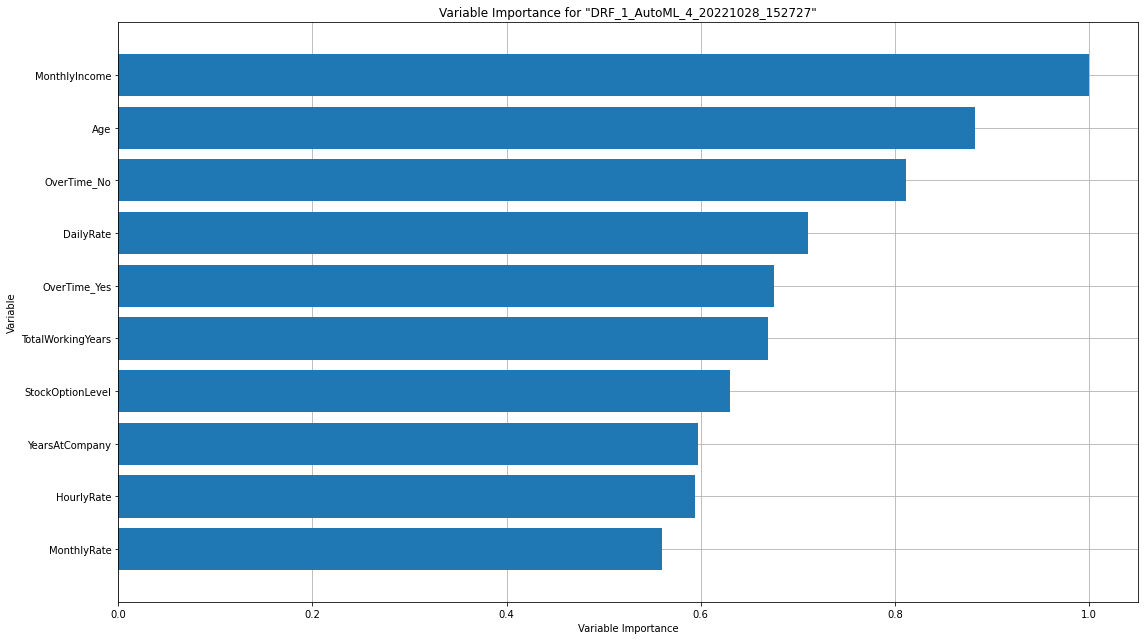

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

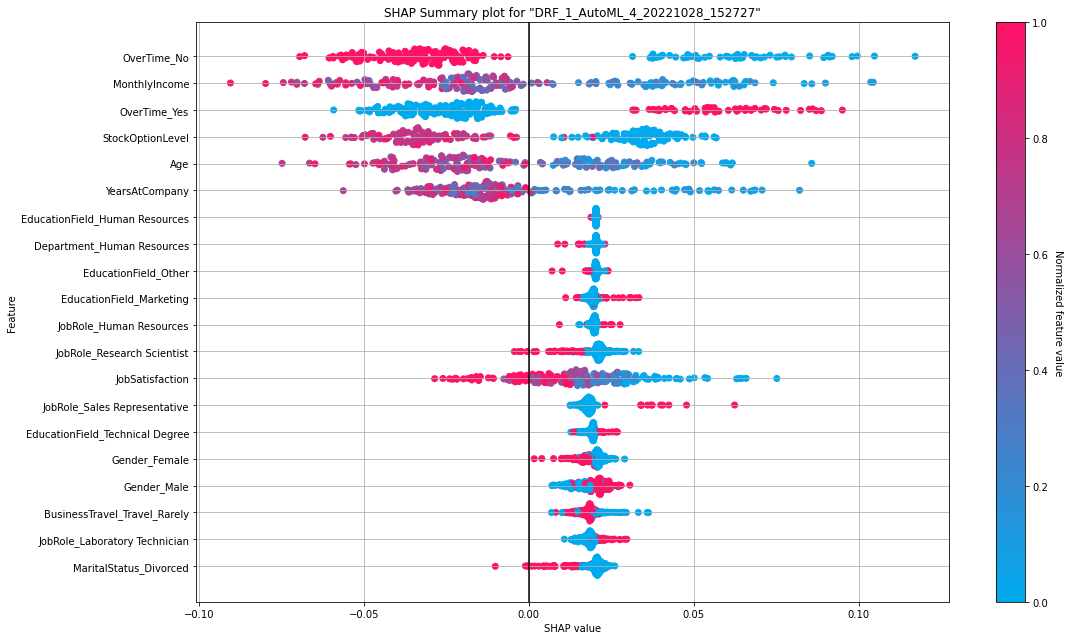

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_4_20221028_152727

,0,1,Error,Rate
0,151.0,17.0,0.1012,(17.0/168.0)
1,12.0,24.0,0.3333,(12.0/36.0)
Total,163.0,41.0,0.1422,(29.0/204.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

In [ ]:
# explainability of a tree-based model
perf = drf.explain(test, include_explanations=['shap_summary', 'confusion_matrix','varimp', 'varimp_heatmap'])
perf

### Feature Importance:  
The h2o variable importance plot is very similar with the random forest one, where monthly income and age are still the top features. Features that we didn't see in the random forest one are StockOptionLevel and whether an employee works overtime or not.

### Shapely:
Shapely values tells you if the feature increase or decrease the prediction. If the values are less than 0, then it decreases and vice versa. The higher the shapely value (more pink), the more influence it has on the prediction. Each point represents a row in the dataset.
- when overtime_no is low (or not true) or when overtime_yes is high (or true), this results in high shapely values.
-  when monthlyincome, stockoptions, age, and yearsatcompany is low, the model will predict it's more likely that a employee will leave the company.

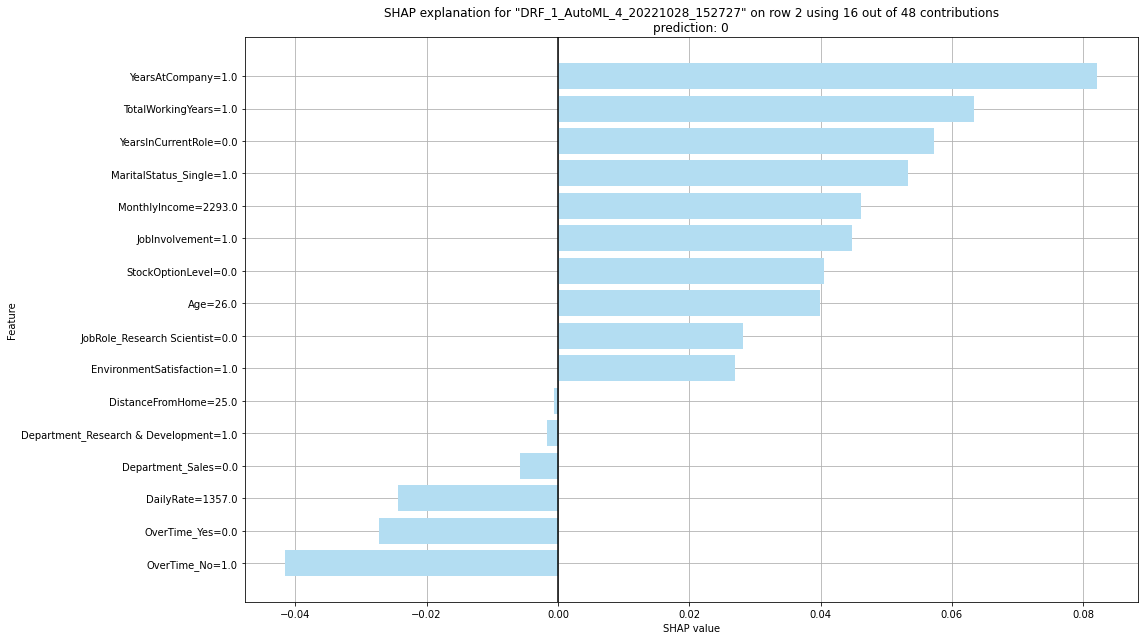

In [ ]:
# explain one row
shap_plot = drf.shap_explain_row_plot(test, row_index=2)
shap_plot

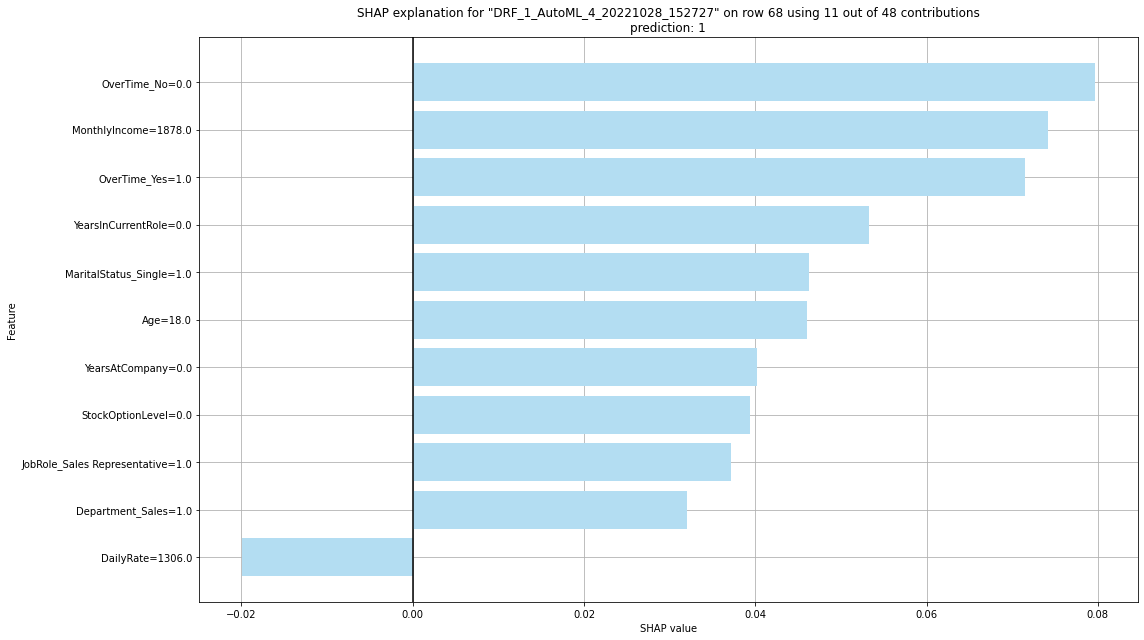

In [ ]:
# explain one attrition row
shap_plot_attr = drf.shap_explain_row_plot(test, row_index=68)
shap_plot_attr

## Conclusion
The key features that will help us detect attrition is overtime hours, monthly income, stock options, age, and years at the company. Employees will more likely leave a company if they are working overtime and/or recieve low compensation. People tend to leave if they are younger in age and have less years of experience. From these findings, HR should focus more on assisting employees that are early in their career or have less than 3 years of experience at the company, and support personal and career development to ensure job statisfaction. This can be achieved by providing opportunities related to mentorships, networking, and continuous learning. Additionally, employees need to be paid fairly to keep attrition low. HR should benchmark all salaries with other companies in the industry to ensure each employee is compensated equally and fairly. Providing equity will also incentivize employees to stay while rewarding them for their contributions to the company's growth. Focus on supporting employees' growth and offering competitive pay will help the attrition rate low.

## Next Steps
- Use other techniques to handle class imbalance such as undersampling
- Apply PCA
